# SIMULATION OF SENSING METHODS.

#### METHODS EVALUATED

###### 1. ED Energy Detector Mothod.

###### 2. CAV Covariance Absolute Value.

###### 3. EME Energy-to-Minimum Eigen Value Detector

In [52]:
import re
import glob
from IPython.core.display import Image
import numpy

#Image(filename='figures/pic.png', width="100%")

Att = 30

fsSNE = 1/6.8e-6

print ("fsSNE = ", fsSNE)

fsSNE =  147058.82352941178


In [53]:
ts = numpy.array([25.0e-3, 12.5e-3, 10.0e-3])

NsSNE = numpy.round(ts*fsSNE)
print ("NsSNE =", NsSNE)

NsSNE = [3676. 1838. 1471.]


In [54]:
Pdmin = 0.9

Pfa = 0.1

Np = 1000

def get_ccdf(x):
    
    xs = numpy.array(x)
    xs.sort()
    N = float(len(xs))
    P = numpy.arange((N)/N)
    
    print ("xs=",xs)
    print(,"P=" P)
    return xs, P

def get_gamma0(gammaN):
    
    gammaN, Pd = get_ccdf(gammaN)
    gamma0 = numpy.interp( 1-Pfa, Pd, gammaN)
    
    return gamma0


SyntaxError: invalid syntax (<ipython-input-54-af99954e42c0>, line 15)

In [55]:
gammaN = numpy.loadtxt("../measurements/pd/usrp/data.dat")
gamma0 = get_gamma0(gammaN)

gammaNs, Pd = get_ccdf(gammaN)
plot(gammaNs, 1.-Pd, 'b--')
plot([gamma0, gamma0], [0, 1], 'g--')
plot([2e-5, 3e-5], [Pfa, Pfa], 'r--')
axis([2e-5, 3e-5, 0, 1])
title("CCDF for ENERGY DETECTOR")
xlabel("$\gamma_0$")
ylabel("$P_{fa}$")
grid()

xs= [2.60157376e-05 2.62895519e-05 2.63156307e-05 2.63342536e-05
 2.63398415e-05 2.63724396e-05 2.63798865e-05 2.63985130e-05
 2.64059672e-05 2.64171376e-05 2.64199407e-05 2.64339069e-05
 2.64385599e-05 2.64460105e-05 2.64590526e-05 2.64990977e-05
 2.65093386e-05 2.65130766e-05 2.65186518e-05 2.65316939e-05
 2.65344952e-05 2.65382150e-05 2.65447397e-05 2.65465987e-05
 2.65484578e-05 2.65521794e-05 2.65568433e-05 2.65568451e-05
 2.65633589e-05 2.65754661e-05 2.65903691e-05 2.65912986e-05
 2.66015486e-05 2.66080733e-05 2.66155203e-05 2.66304214e-05
 2.66322786e-05 2.66332154e-05 2.66434508e-05 2.66453171e-05
 2.66536827e-05 2.66536954e-05 2.66667375e-05 2.66685929e-05
 2.66695315e-05 2.66872303e-05 2.66918887e-05 2.66956140e-05
 2.67039904e-05 2.67095802e-05 2.67114483e-05 2.67244795e-05
 2.67254127e-05 2.67254181e-05 2.67319265e-05 2.67365867e-05
 2.67375217e-05 2.67384421e-05 2.67412506e-05 2.67449632e-05
 2.67459091e-05 2.67477662e-05 2.67477662e-05 2.67505493e-05
 2.67542855e-05 2.67

ValueError: fp and xp are not of the same length.

In [41]:
print ("gamma0 =", gamma0, "@ Pfa =", Pfa)

NameError: name 'gamma0' is not defined

In [76]:
def iterate_campaign(path):
    for fn in glob.glob(path):
        g = re.search("_m([0-9_]+)dbm\.dat$", fn)
        if g:
            Pg = -float(g.group(1).replace('_', '.'))
            gamma = loadtxt(fn)
            
            yield Pg, gamma

#print "Pg =", array(sorted(Pg for Pg, gamma 
      #  in iterate_campaign("../measurements/pd/usrp/usrp_micsoft_fs1mhz_Ns25ks_ed_*.dat")))

In [77]:
def get_campaign_g(path, gamma0):
    Pg = []
    Pd = []
    
    for Pg0, gamma in iterate_campaign(path):
        Pg.append(Pg0)
        Pd.append(mean(gamma > gamma0))
            
    Pg = array(Pg)
    Pd = array(Pd)
    
    Pga = Pg.argsort()
    Pd = Pd[Pga]
    Pg = Pg[Pga]
    
    return Pg, Pd
            
def get_campaign(path, gamma0):
    Pg, Pd = get_campaign_g(path, gamma0)
    
    Pin = Pg - Att
    
    return Pin, Pd

def get_Pinmin(path, Pdth=Pdmin):
    
    gamma0 = None
    
    for fn in glob.glob(path):
        if fn.endswith("_off.dat"):
            gammaN = loadtxt(fn)
            gamma0 = get_gamma0(gammaN)
            break
            
    Pin, Pd = get_campaign(path, gamma0)
    
    Pinmin = interp(Pdth, Pd, Pin)
    
    return Pinmin

Pinmin (Energy Detector) = -116.143939394 @ Pdmin (Energy Detector) = 0.9


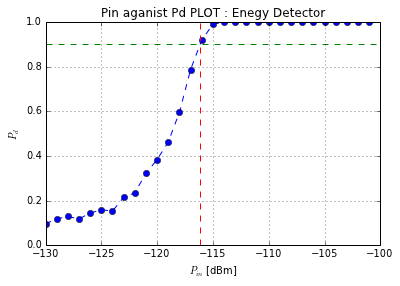

In [97]:
Pinmin = get_Pinmin("../measurements/pd/usrp/usrp_micsoft_fs1mhz_Ns25ks_ed_*.dat")
print "Pinmin (Energy Detector) =", Pinmin, "@ Pdmin (Energy Detector) =", Pdmin

Pin, Pd = get_campaign("../measurements/pd/usrp/usrp_micsoft_fs1mhz_Ns25ks_ed_*.dat", gamma0)
plot(Pin, Pd, 'o--' )
plot([Pinmin, Pinmin], [0, 1], 'r--')
x1, x2, y1, y2 = axis()
plot([x1, x2], [Pdmin, Pdmin], 'g--')
title("Pin aganist Pd PLOT : Enegy Detector")
xlabel("$P_{in}$ [dBm]")
ylabel("$P_d$")
grid()

Pinmin (Covariance Absolute Value) = -101.0 @ Pdmin (Covariance Absolute Value )= 0.9


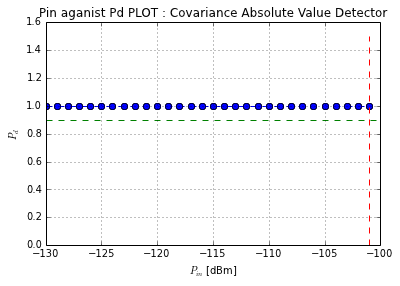

In [100]:
Pinmin = get_Pinmin("../measurements/pd/usrp/usrp_micsoft_fs1mhz_Ns25ks_cav_*.dat")
print "Pinmin (Covariance Absolute Value) =", Pinmin, "@ Pdmin (Covariance Absolute Value )=", Pdmin

Pin, Pd = get_campaign("../measurements/pd/usrp/usrp_micsoft_fs1mhz_Ns25ks_cav_*.dat", gamma0)
plot(Pin, Pd, 'o--' )
plot([Pinmin, Pinmin], [0, 1.5], 'r--')
x1, x2, y1, y2 = axis()
plot([x1, x2], [Pdmin, Pdmin], 'g--')
title("Pin aganist Pd PLOT : Covariance Absolute Value Detector")
xlabel("$P_{in}$ [dBm]")
ylabel("$P_d$")
grid()

Pinmin (Energy-to-Minimum Eigen Value Detector) = -115.0 @ Pdmin (Energy-to-Minimum Eigen Value Detector)= 0.9


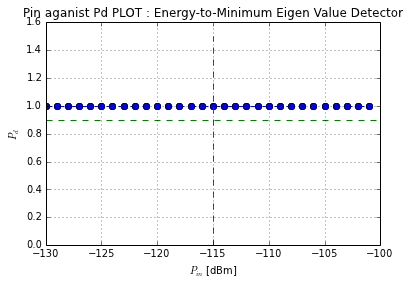

In [102]:
Pinmin = get_Pinmin("../measurements/pd/usrp/usrp_micsoft_fs1mhz_Ns25ks_eme_*.dat")
print "Pinmin (Energy-to-Minimum Eigen Value Detector) =", Pinmin, "@ Pdmin (Energy-to-Minimum Eigen Value Detector)=", Pdmin

Pin, Pd = get_campaign("../measurements/pd/usrp/usrp_micsoft_fs1mhz_Ns25ks_eme_*.dat", gamma0)
plot(Pin, Pd, 'o--' )
plot([Pinmin, Pinmin], [0, 1.5], 'r--')
x1, x2, y1, y2 = axis()
plot([x1, x2], [Pdmin, Pdmin], 'g--')
title("Pin aganist Pd PLOT : Energy-to-Minimum Eigen Value Detector")
xlabel("$P_{in}$ [dBm]")
ylabel("$P_d$")
grid()

In [84]:
method_ps = set()
for path in glob.glob("../measurements/pd/usrp/*.dat"):
    g = re.search("ks_(.*)_m", path)
    if g:
        method_ps.add(g.group(1))
        
method_ps = sorted(method_ps)

In [85]:
def get_batch_Pinmin_permethod(path, Pdth=Pdmin):
    Pinmin_permethod = {}
    for method_p in method_ps:
        path2 = path.replace("*", "%s_*" % (method_p,))
        Pinmin_permethod[method_p] = get_Pinmin(path2, Pdmin)
        
    return Pinmin_permethod

In [107]:
from matplotlib import cm

def plot_comparisson(Pinmin_permethod):
    
    cmap = cm.get_cmap('gist_rainbow')

    left = []
    height = []
    labels = []
    colors = []

    methods = ['ed', 'cav', 'cfn', 'mac', 'mme', 'eme', 'agm', 'met']

    left1 = 0.
    for n, method in enumerate(methods):
        if method == 'ed':
            method_ps = [ 'ismtv', 'ed']
        else:
            method_ps = [ "%s_l%d" % (method, l) for l in xrange(5, 25, 5) ]
        
        for m, method_p in enumerate(method_ps):
            try:
                Pinmin = Pinmin_permethod[method_p]
            except KeyError:
                continue
        
            left.append(left1)
            height.append(Pinmin)
        
            if method_p == 'ed':
                label = 'ED (USRP)'
            elif method_p == 'ismtv':
                label = 'ED (ISMTV)'
            else:
                label = method_p.upper()
                label = re.sub("_L(\d+)", r" $L=\1$", label)

            labels.append(label)
        
            c = cmap(float(n)/(len(methods)-1) + m*.007)
            # Color
            colors.append(c)
            
            # BW
            #colors.append(.85)
            
            left1 += 1.
        
        left1 += 1
    
    height = array(height)
    left = array(left)

    # print
    #figure(figsize=(13, 5))
    
    # screen
    figure(figsize=(12, 5))
    
    #o = 100
    #bar(left, -height-o, color=colors, bottom=o)
    bar(left, height, color=colors)
    
    for x, y in zip(left, height):
        text(x+.4, y-1., "%.1f" % y, horizontalalignment="center", rotation=70, backgroundcolor='w')
    
    xticks(left+.4, labels, rotation=60, horizontalalignment='right')
    ylabel("$P_{in}$ [dBm] @ $P_d = 0.9$")
    #ylim(100, 118)
    ylim(-125, -100)
    xlim(-.5, left1-.5)
    tight_layout()
    grid()
    

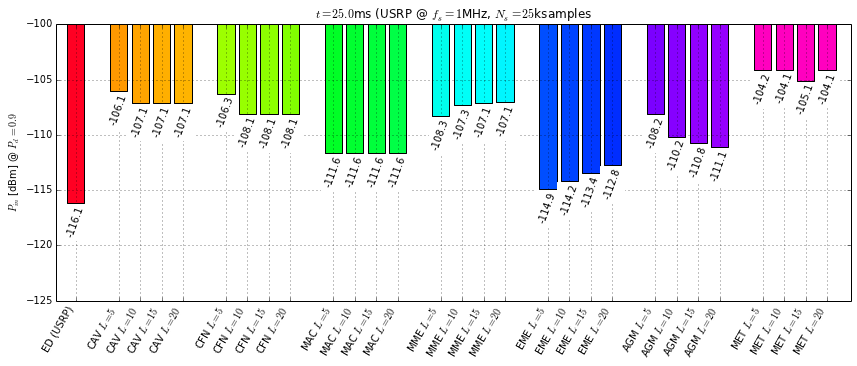

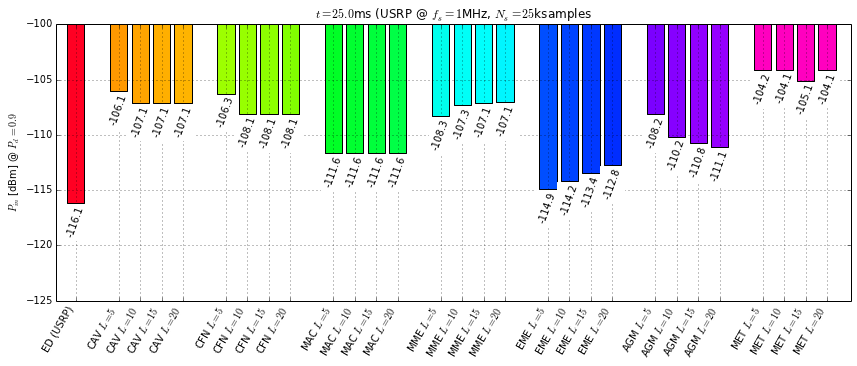

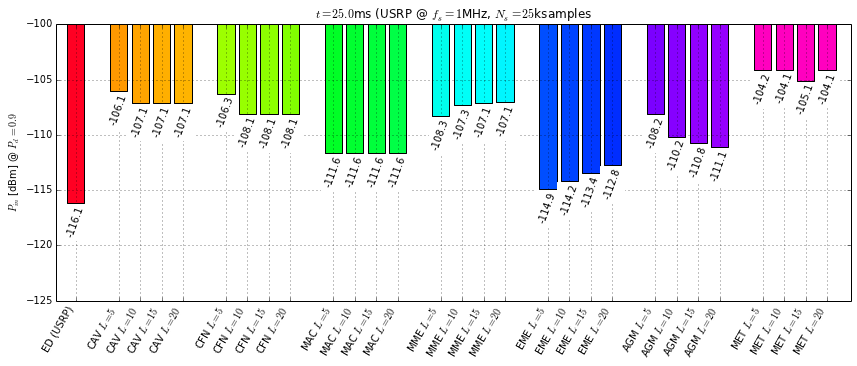

In [108]:
Pinmin_permethod_25ms = get_batch_Pinmin_permethod("../measurements/pd/usrp/usrp_micsoft_fs1mhz_Ns25ks_*.dat")
#Pinmin_permethod_25ms['ismtv'] = get_Pinmin("../measurements/pd/sneismtv/sneismtv_micsoft_fs0mhz_Ns3ks_ed_n3676_*.dat")

plot_comparisson(Pinmin_permethod_25ms)
title("$t=25.0$ms (USRP @ $f_s=1$MHz, $N_s=25$ksamples");

savefig("figures/pin_min_comparison_25ms.png", dpi=300)
#savefig("pin_min_comparison_25ms.eps")
None